# Logistics Regression
---

## the data
 我们将建立一个逻辑回归模型来预测一个学生是否被大学录取，假设你是大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会，你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集，对于每一个培训例子，你有两们考试的申请人的分数和录取觉得，为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率


In [1]:
# 三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

/Users/marlonleng/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
import os

path = 'data' + os.sep + 'LogiReg_data.txt'
print(path)
pdData = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
pdData.head()

data/LogiReg_data.txt


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
pdData.shape

(100, 3)

Text(0,0.5,'Exam 2 score')

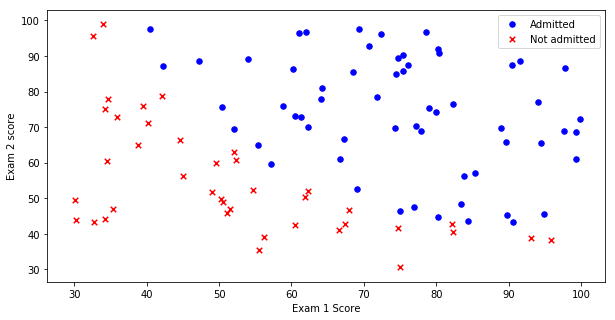

In [14]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=30,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,c='r',marker='x',label='Not admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 score')


## The logistic regression
 目标：建立分类器，（求解出三个参数 $\theta_1,\theta_2,\theta_3$）
 
 设定阈值，根据阈值判断录取结果
 
 ### 要完成的模块
 - sigmod：映射到概率的函数
 - model：返回预测结果值
 - cost：目标函数
 - gradient：计算每个参数的梯度方向
 - descend：进行参数更新
 - accuracy：计算精度

#### sigmoid 函数   
## $g(Z) = \frac{1}{1+e^\left(-Z\right)}$

In [15]:
def sigmod(z):
    return 1/(1+np.exp(-z))

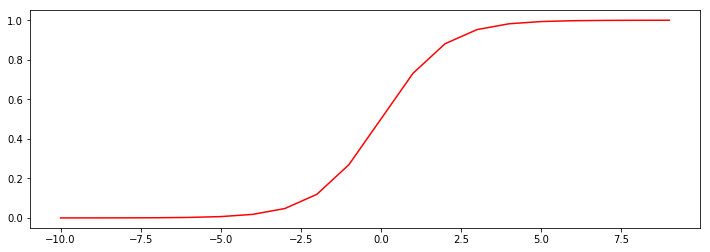

In [17]:
nums = np.arange(-10,10,step=1)
fig ,ax = plt.subplots(figsize=(12,4))
ax.plot(nums,sigmod(nums),c='r')

## Sigmod
- g:R-> [0,1]
- g(0) = 0.5
- g(-$\infty$) = 0
- g(+$\infty$) = 1

# model

In [29]:
def model(X,theta):
    return sigmod(np.dot(X,theta.T))

$(\theta_1,\theta_2,\theta_3) *\left(\begin {matrix} 1 \\x_1\\x_2 \end{matrix}\right) = \theta_0+\theta_1x1+\theta_2x2$

In [22]:
pdData.insert(0,'Ones',1)

# 
orig_data = pdData.as_matrix()
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

theta = np.zeros([1,3])

/Users/marlonleng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [23]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [24]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [25]:
theta

array([[0., 0., 0.]])

In [26]:
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (1, 3))

### 损失函数
将对数似然函数去负号
### $D(h_0(x),y) = -y\log(h_0(x)) - (1-y)\log(1-h_0(x))$

求平均损失
### $J(\theta) = \frac {1}{n} \sum_\left(i=1\right)^n\ D(h_0(x_i),y_i)$

In [30]:
def cost(X,y,theta):
    left = np.multiply(-y,np.log(model(X,theta)))
    right = np.multiply(1-y,np.log(1- model(X,theta)))
    return np.sum(left-right)/len(X)

In [31]:
cost(X,y,theta)

0.6931471805599453

# 计算梯度

### $\frac {\partial J}{\partial \theta_j} = - \frac {1}{m} \sum_\left(i=1\right)^m (y_i- h_0(x_i))x_\left(ij\right)$

In [32]:
def gradient(X,y,theta):
    grad = np.zeros(theta.shape)
    error = (model(X,theta) - y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error,X[:,j])
        grad[0,j] = np.sum(term)/len(X)
    return grad

# Gradient descent
比较三种不同的梯度下降方法

In [2]:
# 迭代次数
STOP_ITER = 0
# 损失函数的下降阈值
STOP_COST = 1
# 梯度变化率较
STOP_GRAD = 2

def stopCriterion(type,value,threshold):
#     设定三种不同的停止策略
    if type == STOP_ITER: return value > threshold
    elif type == STOP_COST: return abs(value[-1]- value[-2]) < threshold
    elif type == STOP_GRAD: return np.linalg.norm(value) < threshold

In [1]:
import numpy.random

def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:,0:cols-1]
    y = data[:,cols-1,]
    return X,y

In [3]:
import time
def descent(data,theta,batchSize,stoptype,thresh,alpha):
    init_time = time.time()

    i = 0  #迭代次数
    k= 0  #  batch
    X,y = shuffleData(data)
    grad = np.zeros(theta.shape) #计算的梯度
    costs = [cost(X,y,theta)]  #损失值
    
    while True:
        grad = gradient(X[k:k+batchSize],y[k:k+batchSize],theta)
        k += batchSize
        if k > n:
            k = 0
            X,y = shuffleData(data)
        theta = theta - alpha*grad  #更新参数
        costs.append(cost(X,y,theta))
        i += 1
        if stoptype == STOP_ITER: value = i
        elif stoptype == STOP_COST: value = costs
        elif stoptype == STOP_GRAD: value = grad
        if stopCriterion(stoptype,value,threshold=thresh):break
    return theta,i-1,costs,time.time()-init_time


In [ ]:
def runExoe(data,theta,batchSize,stopType,thresh,alpha):
    theta,iters,costs,duration = descent(data,theta,batchSize,stopType,thresh,alpha)
    
    name = "Original" if (data[:,1] > 2).sum() > 1 else "Scaled"
    name += 'data - learning rate:{}'.fromat(alpha)
    if batchSize == n:strDesctype = 'Gradient'
    elif batchSize == 1:strDesctype = 'Stochastic'
    else strDesctype = 'Mini-batch ({})'.format(batchSize)
    
    name += strDesctype + 'descent - Stop'
    
    if stopType == STOP_ITER:strStop = "{} iterations".format(iters)
    elif stopType == STOP_COST:strStop = "cost change < {}".format(thresh)
    else strStop = "gradient norm < {}".format(thresh)
    
    name += strStop
    
    print("***{} \ n Theta:{} - Iter:{} - Last cost:{:03.2f} - Duration:{}".format(name,theta,iters,costs[-1],duration))
    
    fig,ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs),costs,'r'))
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + '- Error vs. Iteration')
    return theta
    

